In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("Assignment-1_Data.csv",sep=';',low_memory=False)

In [4]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [6]:
df.isna().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [7]:
df.dropna(subset =['Itemname'],inplace=True)
df['Itemname'] = df['Itemname'].str.strip() 

In [8]:
df=df[df['Quantity']>0]

In [9]:
df.isna().sum()

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    132113
Country            0
dtype: int64

In [10]:
df['CustomerID'].fillna(df['CustomerID'].mean(), inplace=True)


In [11]:
df.duplicated().sum()

5286

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(514850, 7)

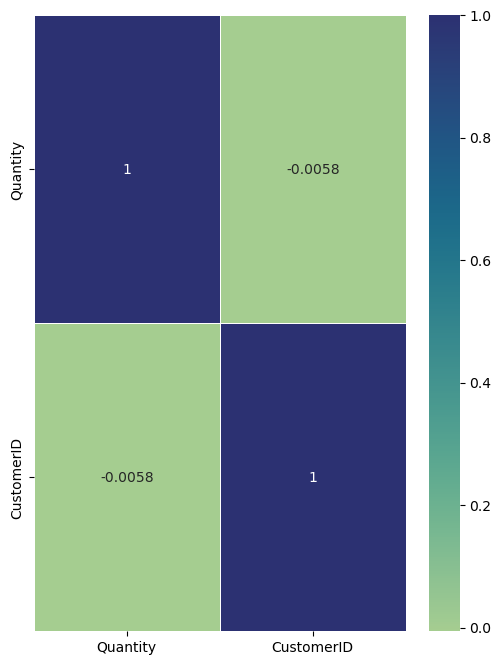

In [15]:
plt.figure(figsize=(6,8))
sns.heatmap(df.corr(),cmap='crest',linewidth=.5,annot=True)
plt.show()

In [102]:
basket=(df[df['Country']=='United Kingdom']
       .groupby(['BillNo','Itemname']).agg({'Quantity':'sum'}).reset_index().pivot(index='BillNo',columns='Itemname').fillna(0))

In [103]:
basket.head()

Quantity                                                 \
Itemname *Boombox Ipod Classic *USB Office Mirror Ball 10 COLOUR SPACEBOY PEN   
BillNo                                                                          
536365                     0.0                     0.0                    0.0   
536366                     0.0                     0.0                    0.0   
536367                     0.0                     0.0                    0.0   
536368                     0.0                     0.0                    0.0   
536369                     0.0                     0.0                    0.0   

                                                               \
Itemname 12 COLOURED PARTY BALLOONS 12 DAISY PEGS IN WOOD BOX   
BillNo                                                          
536365                          0.0                       0.0   
536366                          0.0                       0.0   
536367                          0.0                       0.0   
536368                          0.0                       0.0   
536369                          0.0                       0.0   

                                                                 \
Itemname 12 EGG HOUSE PAINTED WOOD 12 HANGING EGGS HAND PAINTED   
BillNo                                                            
536365                         0.0                          0.0   
536366                         0.0                          0.0   
536367                         0.0                          0.0   
536368                         0.0                          0.0   
536369                         0.0                          0.0   

                                                                           \
Itemname 12 IVORY ROSE PEG PLACE SETTINGS 12 MESSAGE CARDS WITH ENVELOPES   
BillNo                                                                      
536365                                0.0                             0.0   
536366                                0.0                             0.0   
536367                                0.0                             0.0   
536368                                0.0                             0.0   
536369                                0.0                             0.0   

                                        ...                            \
Itemname 12 PENCIL SMALL TUBE WOODLAND  ... returned taig adjust test   
BillNo                                  ...                             
536365                             0.0  ...      0.0         0.0  0.0   
536366                             0.0  ...      0.0         0.0  0.0   
536367                             0.0  ...      0.0         0.0  0.0   
536368                             0.0  ...      0.0         0.0  0.0   
536369                             0.0  ...      0.0         0.0  0.0   

                                                                               \
Itemname to push order througha s stock was website fixed wrongly coded 20713   
BillNo                                                                          
536365                                  0.0           0.0                 0.0   
536366                                  0.0           0.0                 0.0   
536367                                  0.0           0.0                 0.0   
536368                                  0.0           0.0                 0.0   
536369                                  0.0           0.0                 0.0   

                                                                  \
Itemname wrongly coded 23343 wrongly marked wrongly marked 23343   
BillNo                                                             
536365                   0.0            0.0                  0.0   
536366                   0.0            0.0                  0.0   
536367                   0.0            0.0                  0.0   
536368                   0.0            0.0             

In [104]:
def encode(x):
    if(x>=1):
        return 1
    elif(x<=0):
        return 0;
basket_set=basket.applymap(encode)

In [105]:
basket_set.shape


(18194, 4046)

In [106]:
basket_set.head()


Quantity                                                 \
Itemname *Boombox Ipod Classic *USB Office Mirror Ball 10 COLOUR SPACEBOY PEN   
BillNo                                                                          
536365                       0                       0                      0   
536366                       0                       0                      0   
536367                       0                       0                      0   
536368                       0                       0                      0   
536369                       0                       0                      0   

                                                               \
Itemname 12 COLOURED PARTY BALLOONS 12 DAISY PEGS IN WOOD BOX   
BillNo                                                          
536365                            0                         0   
536366                            0                         0   
536367                            0                         0   
536368                            0                         0   
536369                            0                         0   

                                                                 \
Itemname 12 EGG HOUSE PAINTED WOOD 12 HANGING EGGS HAND PAINTED   
BillNo                                                            
536365                           0                            0   
536366                           0                            0   
536367                           0                            0   
536368                           0                            0   
536369                           0                            0   

                                                                           \
Itemname 12 IVORY ROSE PEG PLACE SETTINGS 12 MESSAGE CARDS WITH ENVELOPES   
BillNo                                                                      
536365                                  0                               0   
536366                                  0                               0   
536367                                  0                               0   
536368                                  0                               0   
536369                                  0                               0   

                                        ...                            \
Itemname 12 PENCIL SMALL TUBE WOODLAND  ... returned taig adjust test   
BillNo                                  ...                             
536365                               0  ...        0           0    0   
536366                               0  ...        0           0    0   
536367                               0  ...        0           0    0   
536368                               0  ...        0           0    0   
536369                               0  ...        0           0    0   

                                                                               \
Itemname to push order througha s stock was website fixed wrongly coded 20713   
BillNo                                                                          
536365                                    0             0                   0   
536366                                    0             0                   0   
536367                                    0             0                   0   
536368                                    0             0                   0   
536369                                    0             0                   0   

                                                                  \
Itemname wrongly coded 23343 wrongly marked wrongly marked 23343   
BillNo                                                             
536365                     0              0                    0   
536366                     0              0                    0   
536367                     0              0                    0   
536368                     0              0             

In [107]:
basket_set.drop(basket_set.columns[0],inplace=True,axis=1)


In [108]:
from mlxtend.frequent_patterns import  apriori,association_rules


In [109]:
frequent_items=apriori(basket_set,use_colnames=True,min_support=0.025)
frequent_items

C:\Users\lab11\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.046994,"((Quantity, 6 RIBBONS RUSTIC CHARM))"
1,0.031934,"((Quantity, 60 CAKE CASES VINTAGE CHRISTMAS))"
2,0.041387,"((Quantity, 60 TEATIME FAIRY CAKE CASES))"
3,0.030505,"((Quantity, 72 SWEETHEART FAIRY CAKE CASES))"
4,0.048148,"((Quantity, ALARM CLOCK BAKELIKE GREEN))"
...,...,...
218,0.030010,"((Quantity, ROSES REGENCY TEACUP AND SAUCER), ..."
219,0.025723,"((Quantity, RED HANGING HEART T-LIGHT HOLDER),..."
220,0.025173,"((Quantity, RED RETROSPOT CHARLOTTE BAG), (Qua..."
221,0.029021,"((Quantity, WOODEN PICTURE FRAME WHITE FINISH)..."


In [110]:
res=association_rules(frequent_items,metric='lift', min_threshold=1.5)
res.shape

(76, 10)

In [111]:
res.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"((Quantity, ALARM CLOCK BAKELIKE RED))","((Quantity, ALARM CLOCK BAKELIKE GREEN))",0.051116,0.048148,0.030944,0.605376,12.573307,0.028483,2.412051,0.970051
1,"((Quantity, ALARM CLOCK BAKELIKE GREEN))","((Quantity, ALARM CLOCK BAKELIKE RED))",0.048148,0.051116,0.030944,0.642694,12.573307,0.028483,2.655663,0.967027
2,"((Quantity, RED RETROSPOT CHARLOTTE BAG))","((Quantity, CHARLOTTE BAG PINK POLKADOT))",0.049742,0.037045,0.026327,0.529282,14.287467,0.024485,2.045714,0.978690
3,"((Quantity, CHARLOTTE BAG PINK POLKADOT))","((Quantity, RED RETROSPOT CHARLOTTE BAG))",0.037045,0.049742,0.026327,0.710682,14.287467,0.024485,3.284483,0.965786
4,"((Quantity, RED RETROSPOT CHARLOTTE BAG))","((Quantity, CHARLOTTE BAG SUKI DESIGN))",0.049742,0.044190,0.026108,0.524862,11.877285,0.023909,2.011646,0.963744


In [113]:
res[(res['lift'] >= 1) &
       (res['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"((Quantity, ALARM CLOCK BAKELIKE RED))","((Quantity, ALARM CLOCK BAKELIKE GREEN))",0.051116,0.048148,0.030944,0.605376,12.573307,0.028483,2.412051,0.970051
1,"((Quantity, ALARM CLOCK BAKELIKE GREEN))","((Quantity, ALARM CLOCK BAKELIKE RED))",0.048148,0.051116,0.030944,0.642694,12.573307,0.028483,2.655663,0.967027
2,"((Quantity, RED RETROSPOT CHARLOTTE BAG))","((Quantity, CHARLOTTE BAG PINK POLKADOT))",0.049742,0.037045,0.026327,0.529282,14.287467,0.024485,2.045714,0.978690
3,"((Quantity, CHARLOTTE BAG PINK POLKADOT))","((Quantity, RED RETROSPOT CHARLOTTE BAG))",0.037045,0.049742,0.026327,0.710682,14.287467,0.024485,3.284483,0.965786
4,"((Quantity, RED RETROSPOT CHARLOTTE BAG))","((Quantity, CHARLOTTE BAG SUKI DESIGN))",0.049742,0.044190,0.026108,0.524862,11.877285,0.023909,2.011646,0.963744
5,"((Quantity, CHARLOTTE BAG SUKI DESIGN))","((Quantity, RED RETROSPOT CHARLOTTE BAG))",0.044190,0.049742,0.026108,0.590796,11.877285,0.023909,2.322212,0.958147
6,"((Quantity, DOTCOM POSTAGE))","((Quantity, JUMBO BAG RED RETROSPOT))",0.038914,0.106519,0.026657,0.685028,6.431065,0.022512,2.836703,0.878698
8,"((Quantity, GARDENERS KNEELING PAD KEEP CALM))","((Quantity, GARDENERS KNEELING PAD CUP OF TEA))",0.049357,0.041222,0.029735,0.602450,14.614631,0.027700,2.411715,0.979942
9,"((Quantity, GARDENERS KNEELING PAD CUP OF TEA))","((Quantity, GARDENERS KNEELING PAD KEEP CALM))",0.041222,0.049357,0.029735,0.721333,14.614631,0.027700,3.411399,0.971628
10,"((Quantity, PINK REGENCY TEACUP AND SAUCER))","((Quantity, GREEN REGENCY TEACUP AND SAUCER))",0.038639,0.051336,0.031714,0.820768,15.988282,0.029730,5.292945,0.975132
